In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
df_vaccination = pd.read_csv('cumulative-covid-vaccinations.csv')

In [3]:
df_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,12130,12130,12130,12130,12130,12130,12130,12134,12134,12134
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,6401,6401,6401,6401,6401,6401,6401,6406,6406,6406
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2750,2750,2750,2750,2750,2750,2750,2755,2755,2755


In [4]:
df_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,16,16,16,16,16,16,16,16,16,16
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,43,43,43,43,43,43,43,43,43,43
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,50,50,50,50,50,50,50,51,51,51


In [5]:
df_vaccination

,Entity,Code,Day,total_vaccinations
0,Afghanistan,AFG,2021-02-22,0
1,Afghanistan,AFG,2021-02-28,8200
2,Afghanistan,AFG,2021-03-16,54000
3,Afghanistan,AFG,2021-04-07,120000
4,Afghanistan,AFG,2021-04-22,240000
...,...,...,...,...
85098,Zimbabwe,ZWE,2022-10-01,12212594
85099,Zimbabwe,ZWE,2022-10-02,12214870
85100,Zimbabwe,ZWE,2022-10-03,12216848
85101,Zimbabwe,ZWE,2022-10-05,12219760


In [6]:
vdf = df_vaccination[df_vaccination['Code']=='USA']

In [7]:
vdf = vdf.iloc[:,2:]

In [8]:
vdf

,Day,total_vaccinations
77501,2020-12-13,45620
77502,2020-12-14,50468
77503,2020-12-15,98353
77504,2020-12-16,258504
77505,2020-12-17,533742
...,...,...
78374,2023-05-05,676599339
78375,2023-05-06,676640011
78376,2023-05-07,676661397
78377,2023-05-08,676717031


In [9]:
nvdf = vdf.copy()
nvdf['daily_n'] = vdf.total_vaccinations.diff()
nvdf.fillna(45620,inplace=True)

In [10]:
nvdf

,Day,total_vaccinations,daily_n
77501,2020-12-13,45620,45620.0
77502,2020-12-14,50468,4848.0
77503,2020-12-15,98353,47885.0
77504,2020-12-16,258504,160151.0
77505,2020-12-17,533742,275238.0
...,...,...,...
78374,2023-05-05,676599339,105724.0
78375,2023-05-06,676640011,40672.0
78376,2023-05-07,676661397,21386.0
78377,2023-05-08,676717031,55634.0


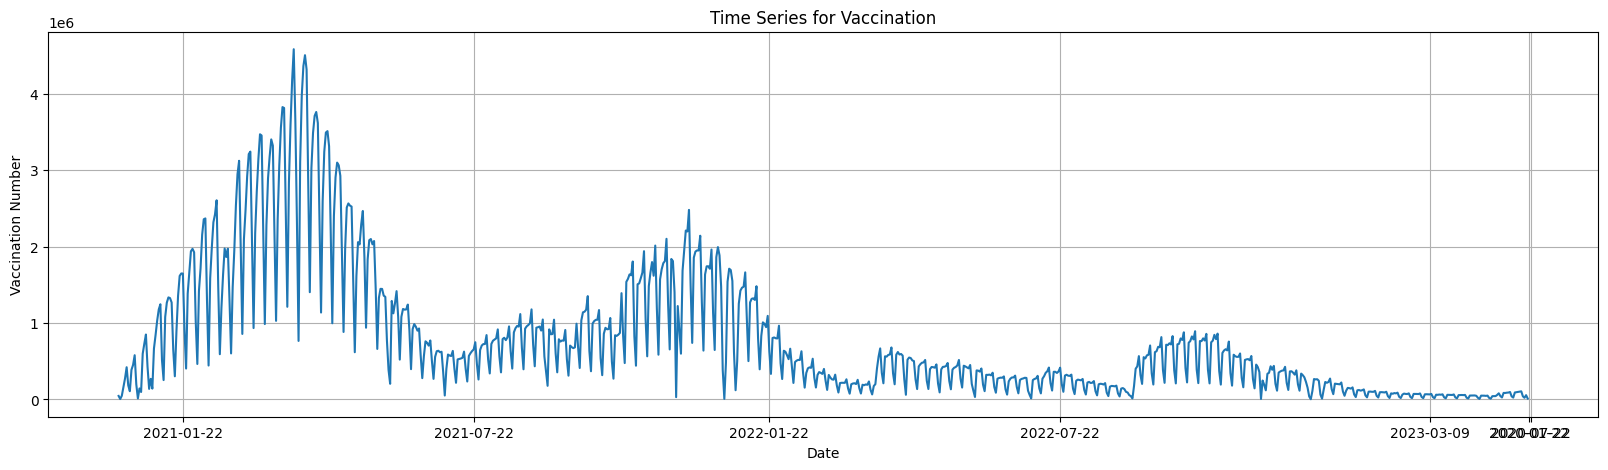

In [11]:
plt.figure(figsize=(20, 5)) 
plt.plot(nvdf.Day,nvdf.daily_n)
plt.xticks(['2020-01-22','2020-07-22','2021-01-22','2021-07-22','2022-01-22','2022-07-22','2023-03-09'])
plt.xlabel('Date')
plt.ylabel('Vaccination Number')
plt.title('Time Series for Vaccination')
plt.grid(True)
plt.show()

In [12]:
cdf = df_confirmed.iloc[:,11:].sum()
cdf

1/22/20            1
1/23/20            1
1/24/20            2
1/25/20            2
1/26/20            5
             ...    
3/5/23     103646975
3/6/23     103655539
3/7/23     103690910
3/8/23     103755771
3/9/23     103802702
Length: 1143, dtype: int64

In [13]:
ncdf = cdf.diff()
ncdf.fillna(cdf,inplace=True)

In [14]:
ncdf

1/22/20        1.0
1/23/20        0.0
1/24/20        1.0
1/25/20        0.0
1/26/20        3.0
            ...   
3/5/23     -3862.0
3/6/23      8564.0
3/7/23     35371.0
3/8/23     64861.0
3/9/23     46931.0
Length: 1143, dtype: float64

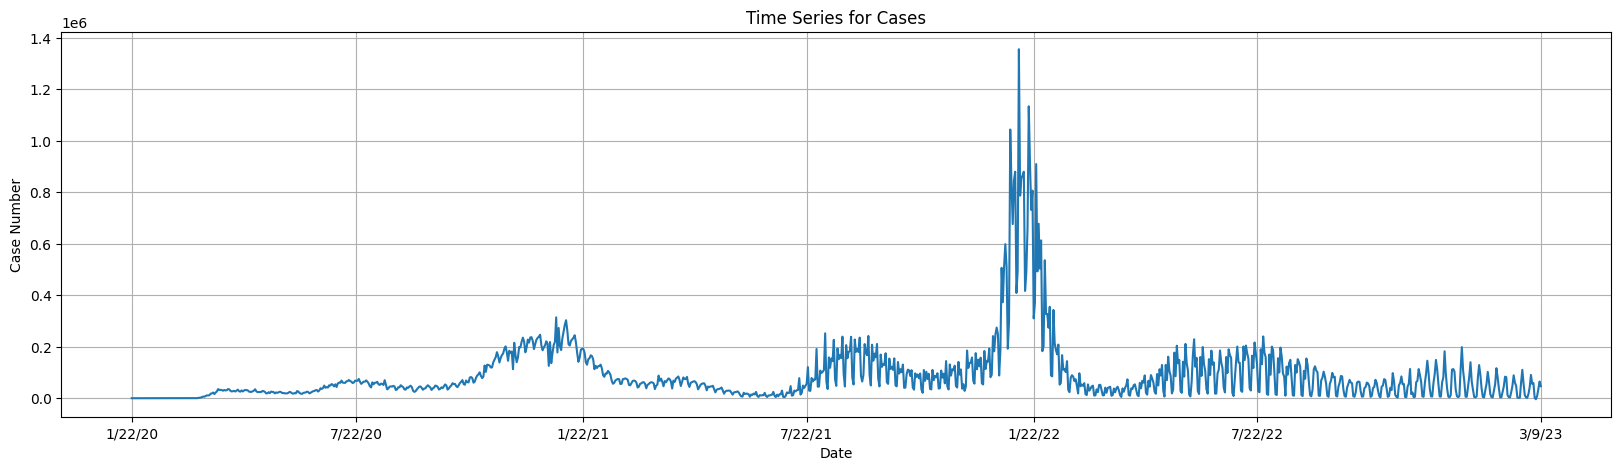

In [15]:
plt.figure(figsize=(20, 5)) 
plt.plot(ncdf)
plt.xticks(['1/22/20','7/22/20','1/22/21','7/22/21','1/22/22','7/22/22','3/9/23'])
plt.xlabel('Date')
plt.ylabel('Case Number')
plt.title('Time Series for Cases')
plt.grid(True)
plt.show()

In [16]:
ddf = df_deaths.iloc[:,12:].sum()
ddf

1/22/20          1
1/23/20          1
1/24/20          1
1/25/20          1
1/26/20          1
            ...   
3/5/23     1122134
3/6/23     1122181
3/7/23     1122516
3/8/23     1123246
3/9/23     1123836
Length: 1143, dtype: int64

In [17]:
nddf = ddf.diff()
nddf.fillna(ddf,inplace=True)

In [18]:
nddf

1/22/20      1.0
1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      0.0
           ...  
3/5/23     -38.0
3/6/23      47.0
3/7/23     335.0
3/8/23     730.0
3/9/23     590.0
Length: 1143, dtype: float64

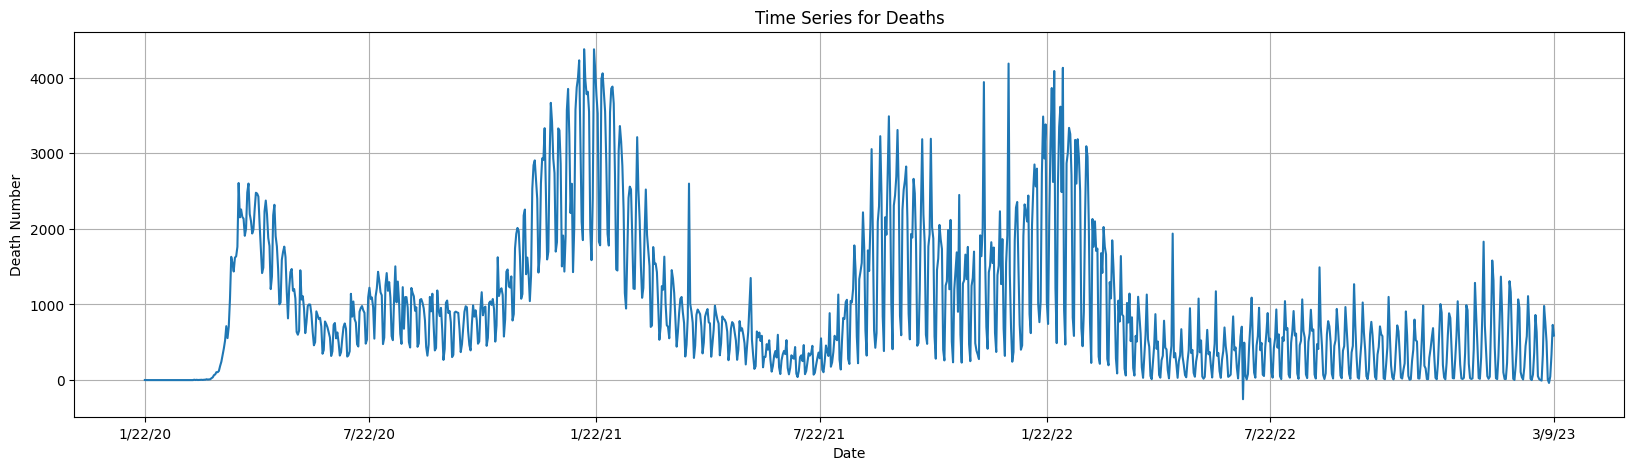

In [19]:
plt.figure(figsize=(20, 5)) 
plt.plot(nddf)
plt.xticks(['1/22/20','7/22/20','1/22/21','7/22/21','1/22/22','7/22/22','3/9/23'])
plt.xlabel('Date')
plt.ylabel('Death Number')
plt.title('Time Series for Deaths')
plt.grid(True)
plt.show()

In [20]:
c_df = ncdf.reset_index()
c_df = c_df.rename(columns={'index':'date',0:'n'})

In [21]:
d_df = nddf.reset_index()
d_df = d_df.rename(columns={'index':'date',0:'n'})

In [22]:
c_df

,date,n
0,1/22/20,1.0
1,1/23/20,0.0
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
...,...,...
1138,3/5/23,-3862.0
1139,3/6/23,8564.0
1140,3/7/23,35371.0
1141,3/8/23,64861.0


In [23]:
d_df

,date,n
0,1/22/20,1.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
1138,3/5/23,-38.0
1139,3/6/23,47.0
1140,3/7/23,335.0
1141,3/8/23,730.0


In [24]:
c_df

,date,n
0,1/22/20,1.0
1,1/23/20,0.0
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
...,...,...
1138,3/5/23,-3862.0
1139,3/6/23,8564.0
1140,3/7/23,35371.0
1141,3/8/23,64861.0


In [25]:
smoothed_values = []
for i in range(len(c_df)):
    if i == 0 or i == 1 or i == 2 or i == 3:
        smoothed_val = (c_df.iloc[i, 1] + c_df.iloc[i+1, 1] + c_df.iloc[i+2, 1] + c_df.iloc[i+3, 1] + c_df.iloc[i+4, 1] + c_df.iloc[i+5, 1]) / 6
    elif i == len(c_df) - 1 or i == len(c_df) - 2 or i == len(c_df) - 3:
        smoothed_val = (c_df.iloc[i, 1] + c_df.iloc[i-1, 1] + c_df.iloc[i-2, 1] + c_df.iloc[i-3, 1] + c_df.iloc[i-4, 1] + c_df.iloc[i-5, 1]) / 6
    else:
        smoothed_val = (c_df.iloc[i-2, 1] + c_df.iloc[i-1, 1] + c_df.iloc[i, 1] + c_df.iloc[i+1, 1] + c_df.iloc[i+2, 1] + c_df.iloc[i+3, 1] + c_df.iloc[i-3, 1]) / 7
    smoothed_values.append(smoothed_val)

In [26]:
smoothed_df = pd.DataFrame({'value': smoothed_values})

In [27]:
c_df['smoothed_value'] = smoothed_df['value']
c_df

,date,n,smoothed_value
0,1/22/20,1.0,0.833333
1,1/23/20,0.0,0.666667
2,1/24/20,1.0,0.833333
3,1/25/20,0.0,0.666667
4,1/26/20,3.0,0.714286
...,...,...,...
1138,3/5/23,-3862.0,31699.857143
1139,3/6/23,8564.0,30420.714286
1140,3/7/23,35371.0,26173.000000
1141,3/8/23,64861.0,27669.000000


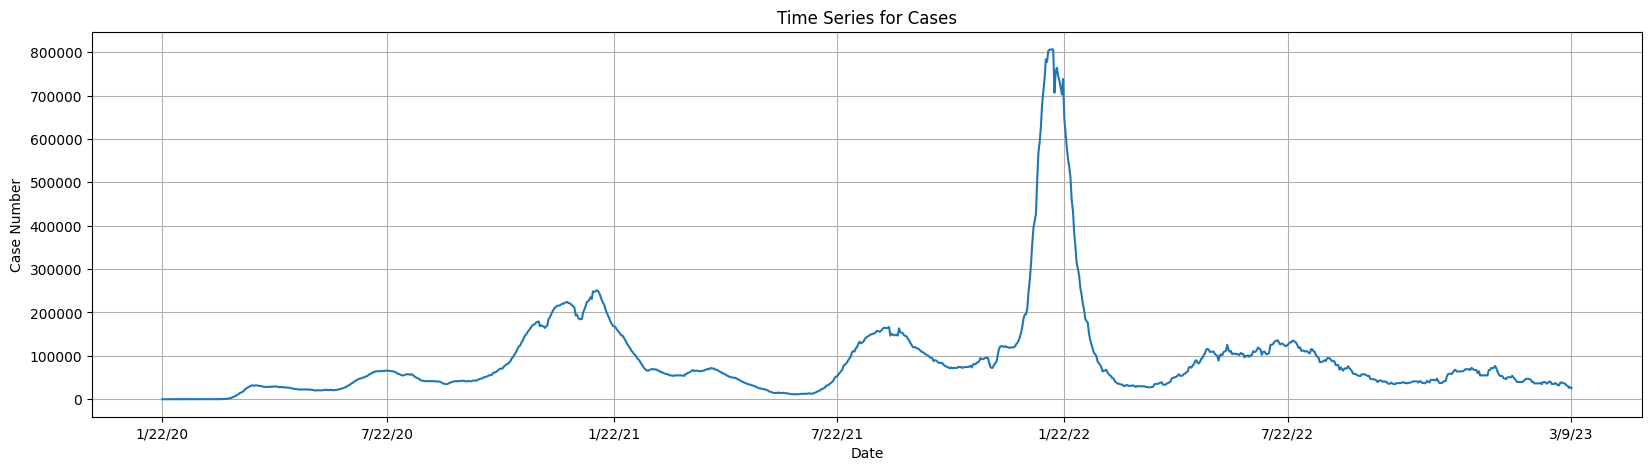

In [28]:
plt.figure(figsize=(20, 5)) 
plt.plot(c_df.date,c_df.smoothed_value)
plt.xticks(['1/22/20','7/22/20','1/22/21','7/22/21','1/22/22','7/22/22','3/9/23'])
plt.xlabel('Date')
plt.ylabel('Case Number')
plt.title('Time Series for Cases')
plt.grid(True)
plt.show()

In [29]:
d_df

,date,n
0,1/22/20,1.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
1138,3/5/23,-38.0
1139,3/6/23,47.0
1140,3/7/23,335.0
1141,3/8/23,730.0


In [30]:
smoothed_values = []
for i in range(len(d_df)):
    if i == 0 or i == 1 or i == 2 or i == 3:
        smoothed_val = (d_df.iloc[i, 1] + d_df.iloc[i+1, 1] + d_df.iloc[i+2, 1] + d_df.iloc[i+3, 1] + d_df.iloc[i+4, 1] + d_df.iloc[i+5, 1]) / 6
    elif i == len(d_df) - 1 or i == len(d_df) - 2 or i == len(d_df) - 3:
        smoothed_val = (d_df.iloc[i, 1] + d_df.iloc[i-1, 1] + d_df.iloc[i-2, 1] + d_df.iloc[i-3, 1] + d_df.iloc[i-4, 1] + d_df.iloc[i-5, 1]) / 6
    else:
        smoothed_val = (d_df.iloc[i-2, 1] + d_df.iloc[i-1, 1] + d_df.iloc[i, 1] + d_df.iloc[i+1, 1] + d_df.iloc[i+2, 1] + d_df.iloc[i+3, 1] + d_df.iloc[i-3, 1]) / 7
    smoothed_values.append(smoothed_val)

In [31]:
smoothed_df = pd.DataFrame({'value': smoothed_values})
d_df['smoothed_value'] = smoothed_df['value']
d_df

,date,n,smoothed_value
0,1/22/20,1.0,0.166667
1,1/23/20,0.0,0.000000
2,1/24/20,0.0,0.000000
3,1/25/20,0.0,0.000000
4,1/26/20,0.0,0.000000
...,...,...,...
1138,3/5/23,-38.0,335.571429
1139,3/6/23,47.0,311.142857
1140,3/7/23,335.0,269.833333
1141,3/8/23,730.0,264.666667


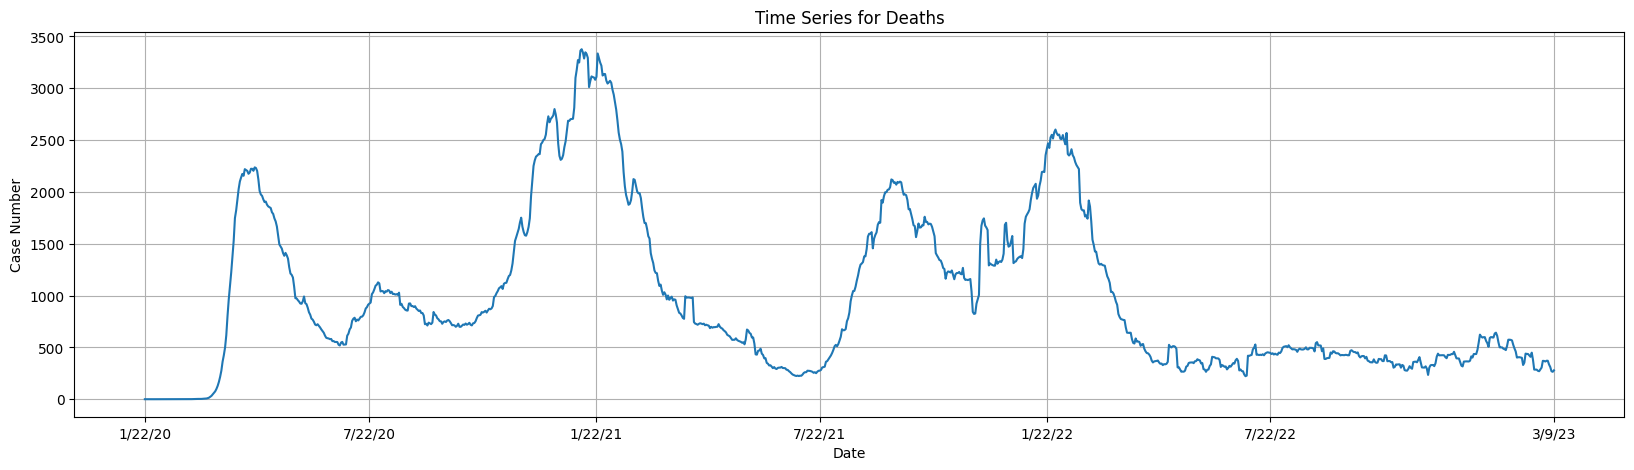

In [32]:
plt.figure(figsize=(20, 5)) 
plt.plot(d_df.date,d_df.smoothed_value)
plt.xticks(['1/22/20','7/22/20','1/22/21','7/22/21','1/22/22','7/22/22','3/9/23'])
plt.xlabel('Date')
plt.ylabel('Case Number')
plt.title('Time Series for Deaths')
plt.grid(True)
plt.show()

In [33]:
nvdf.reset_index(inplace=True, drop=True)
nvdf

,Day,total_vaccinations,daily_n
0,2020-12-13,45620,45620.0
1,2020-12-14,50468,4848.0
2,2020-12-15,98353,47885.0
3,2020-12-16,258504,160151.0
4,2020-12-17,533742,275238.0
...,...,...,...
873,2023-05-05,676599339,105724.0
874,2023-05-06,676640011,40672.0
875,2023-05-07,676661397,21386.0
876,2023-05-08,676717031,55634.0


In [34]:
from datetime import datetime

nvdf['Day'] = pd.to_datetime(nvdf['Day']).dt.strftime("%-m/%-d/%y").str.replace("-0","-")

In [35]:
nvdf.Day = nvdf.Day.str.replace(" 00:00:00","")

In [36]:
nvdf['Day'] = nvdf['Day'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").strftime("%m/%d/%y"))#.str.replace("-0","-"))

In [37]:
nvdf

,Day,total_vaccinations,daily_n
0,12/13/20,45620,45620.0
1,12/14/20,50468,4848.0
2,12/15/20,98353,47885.0
3,12/16/20,258504,160151.0
4,12/17/20,533742,275238.0
...,...,...,...
873,05/05/23,676599339,105724.0
874,05/06/23,676640011,40672.0
875,05/07/23,676661397,21386.0
876,05/08/23,676717031,55634.0


In [38]:
d_df.date = pd.to_datetime(d_df['date']).dt.strftime("%m/%d/%y")

In [39]:
d_df

,date,n,smoothed_value
0,01/22/20,1.0,0.166667
1,01/23/20,0.0,0.000000
2,01/24/20,0.0,0.000000
3,01/25/20,0.0,0.000000
4,01/26/20,0.0,0.000000
...,...,...,...
1138,03/05/23,-38.0,335.571429
1139,03/06/23,47.0,311.142857
1140,03/07/23,335.0,269.833333
1141,03/08/23,730.0,264.666667


In [40]:
c_df.date = pd.to_datetime(c_df['date']).dt.strftime("%m/%d/%y")

In [41]:
c_df

,date,n,smoothed_value
0,01/22/20,1.0,0.833333
1,01/23/20,0.0,0.666667
2,01/24/20,1.0,0.833333
3,01/25/20,0.0,0.666667
4,01/26/20,3.0,0.714286
...,...,...,...
1138,03/05/23,-3862.0,31699.857143
1139,03/06/23,8564.0,30420.714286
1140,03/07/23,35371.0,26173.000000
1141,03/08/23,64861.0,27669.000000


In [42]:
smoothed_values = []
for i in range(len(nvdf)):
    if i == 0 or i == 1 or i == 2 or i == 3:
        smoothed_val = (nvdf.iloc[i, 2] + nvdf.iloc[i+1, 2] + nvdf.iloc[i+2, 2] + nvdf.iloc[i+3, 2] + nvdf.iloc[i+4, 2] + nvdf.iloc[i+5, 2]) / 6
    elif i == len(nvdf) - 1 or i == len(nvdf) - 2 or i == len(nvdf) - 3:
        smoothed_val = (nvdf.iloc[i, 2] + nvdf.iloc[i-1, 2] + nvdf.iloc[i-2, 2] + nvdf.iloc[i-3, 2] + nvdf.iloc[i-4, 2] + nvdf.iloc[i-5, 2]) / 6
    else:
        smoothed_val = (nvdf.iloc[i-2, 2] + nvdf.iloc[i-1, 2] + nvdf.iloc[i, 2] + nvdf.iloc[i+1, 2] + nvdf.iloc[i+2, 2] + nvdf.iloc[i+3, 2] + nvdf.iloc[i-3, 2]) / 7
    smoothed_values.append(smoothed_val)

In [43]:
smoothed_df = pd.DataFrame({'value': smoothed_values})
nvdf['smoothed_value'] = smoothed_df['value']
nvdf

,Day,total_vaccinations,daily_n,smoothed_value
0,12/13/20,45620,45620.0,159131.666667
1,12/14/20,50468,4848.0,182230.500000
2,12/15/20,98353,47885.0,199289.000000
3,12/16/20,258504,160151.0,255825.000000
4,12/17/20,533742,275238.0,171511.714286
...,...,...,...,...
873,05/05/23,676599339,105724.0,74119.857143
874,05/06/23,676640011,40672.0,62309.285714
875,05/07/23,676661397,21386.0,77200.833333
876,05/08/23,676717031,55634.0,70735.666667


In [44]:
nvdf.smoothed_value.max()

3508126.0

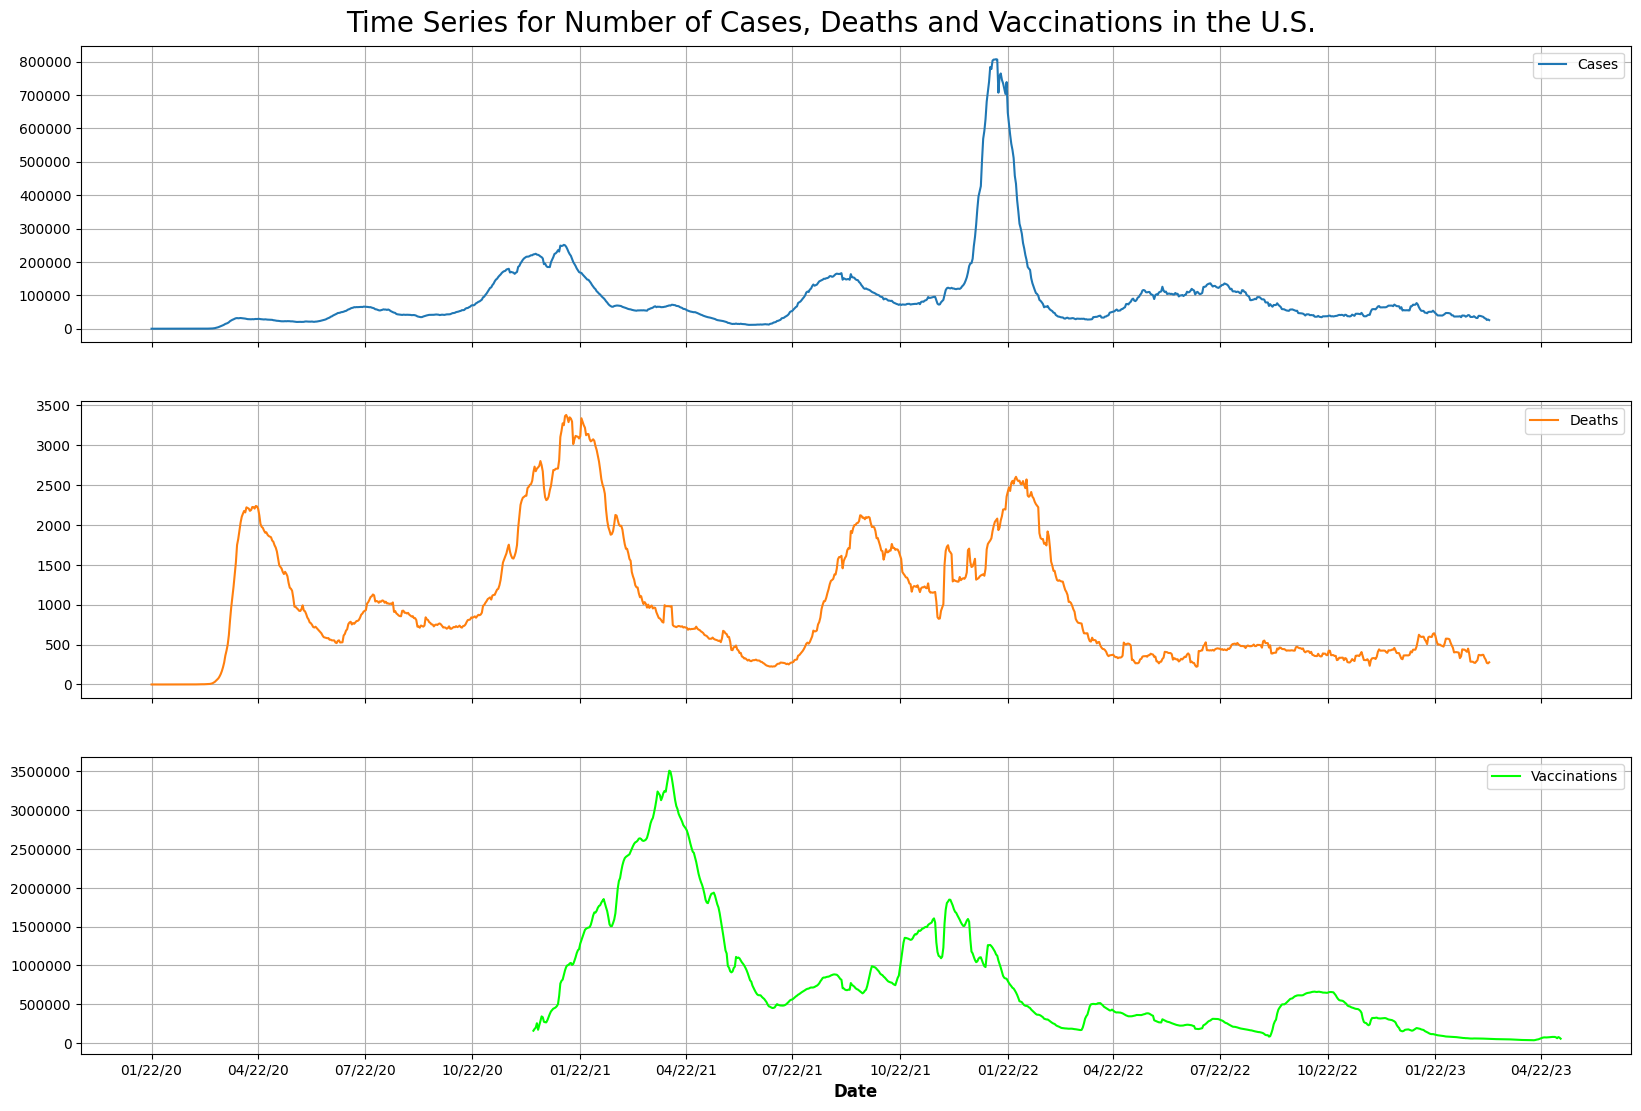

In [68]:
fig, axes = plt.subplots(nrows=3,ncols=1,sharex=True,figsize=(20,12)) 
fig.suptitle('Time Series for Number of Cases, Deaths and Vaccinations in the U.S.',fontsize=20)
plt.subplots_adjust(top=0.95)

axes1 = axes[0]
axes1.plot(c_df.date, c_df.smoothed_value, color='#1f77b4',  label='Cases')
axes1.grid(True)
axes1.legend()

axes2 = axes[1]
axes2.plot(d_df.date, d_df.smoothed_value, color='#ff7f0e',  label='Deaths')
axes2.grid(True)
axes2.legend()

axes3 = axes[2]
axes3.plot(nvdf.Day, nvdf.smoothed_value, color='#00FF00',  label='Vaccinations')
axes3.set_xticks(['01/22/20','04/22/20','07/22/20','10/22/20','01/22/21','04/22/21','07/22/21','10/22/21','01/22/22','04/22/22','07/22/22','10/22/22','01/22/23','04/22/23'])
axes3.set_xlabel('Date',fontweight='bold',fontsize=12)
axes3.grid(True)
axes3.legend()

for ax in axes:
    ax.ticklabel_format(style='plain', axis='y')

plt.show()

For the first peak period in 04/2020, the number of deaths increase rapidly;
For the second peak period in 12/2020, the cases and deaths all increase rapidly, and people start to getting vaccinated;
For the third period in 03/2021, there are many people got vaccinated, at the same time, the number of daily cases and deaths decrease;
For the fourth period in 11/2021-1/2022, the number of cases increase significantly, and the deaths also increase;
For the fifth period which is the date after the fourth period, the cases and deaths are relatively stable.

Guess: 
1. When Covid-19 hit, people did not properly protect and treat the virus, resulting in many deaths in the first peak period in 04/2020.
2. For the second peak period in 12/2020, as winter approaches, Covid-19 is showing an outbreak trend, and the daily number of confirmed cases and deaths remains high. Some areas have begun to encourage people to get vaccinated.
3. With the large coverage of vaccination and the reduction of virus activity caused by warmer weather, the number of daily cases and deaths in the third period have been effectively controlled.
4. During the fourth peak period, the number of confirmed cases increased exponentially. It is inferred that the reasons may include: virus strain mutation, people's reduced vigilance against the virus, winter climate factors, etc.
5. In phase five, daily cases and deaths stabilize, largely due to high coverage with a series of vaccines and widespread immunity.

In [55]:
c_df.iloc[340:365,:]

,date,n,smoothed_value
340,12/27/20,136183.0,184499.142857
341,12/28/20,174633.0,199117.857143
342,12/29/20,206842.0,206545.857143
343,12/30/20,218749.0,214353.857143
344,12/31/20,313926.0,223929.571429
345,01/01/21,177520.0,225658.142857
346,01/02/21,272624.0,229272.428571
347,01/03/21,203213.0,235124.714286
348,01/04/21,186733.0,231001.428571
349,01/05/21,232142.0,248907.142857
